In [1]:
import pandas as pd
import numpy as np
df1 = pd.read_csv("/content/movies.csv")

In [2]:
df1.shape

(62423, 3)

In [3]:
print('Columns',df1.columns.tolist()[:])
pd.options.display.max_columns = None

df1.head()

Columns ['movieId', 'title', 'genres']


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
import re

def clean_title(title):
    return re.sub("[^a-zA-Z0-9 ]", "", title)

In [5]:
df1['genres'] = df1['genres'].str.split('|')
df1['title'] = df1['title'].apply(clean_title)

movies_data = df1[['movieId', 'title', 'genres']]
unique_genres = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).unique()

print(movies_data.head())

   movieId                             title  \
0        1                    Toy Story 1995   
1        2                      Jumanji 1995   
2        3             Grumpier Old Men 1995   
3        4            Waiting to Exhale 1995   
4        5  Father of the Bride Part II 1995   

                                              genres  
0  [Adventure, Animation, Children, Comedy, Fantasy]  
1                     [Adventure, Children, Fantasy]  
2                                  [Comedy, Romance]  
3                           [Comedy, Drama, Romance]  
4                                           [Comedy]  


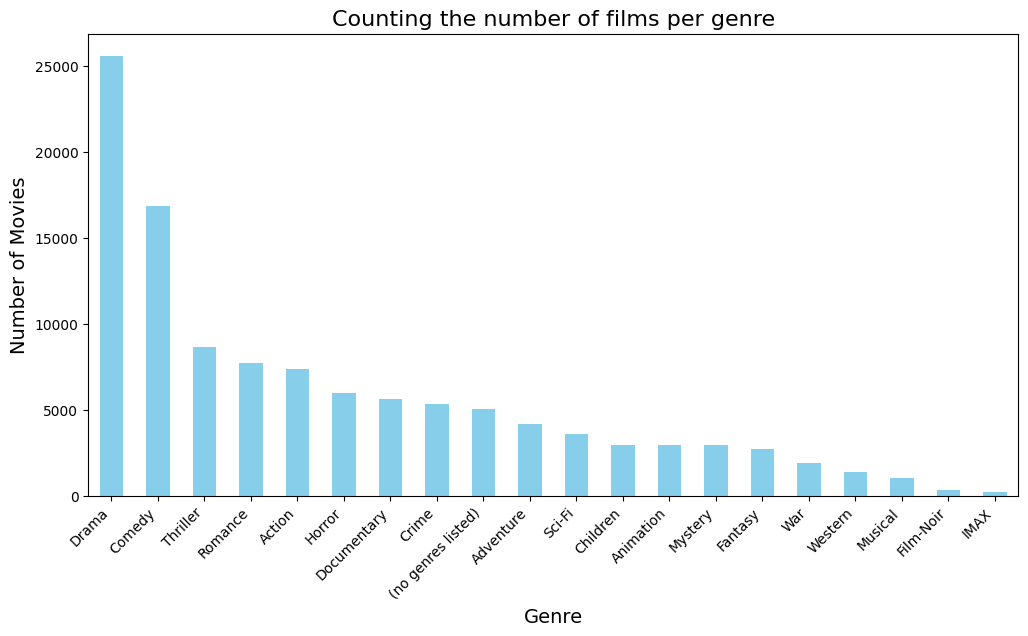

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Counting the number of films per genre
genre_counts = pd.Series([genre for genres_list in movies_data['genres'] for genre in genres_list]).value_counts()

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar', color='skyblue')
plt.title('Counting the number of films per genre', fontsize=16)
plt.xlabel('Genre', fontsize=14)
plt.ylabel('Number of Movies', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.show()

In [7]:
df2 = pd.read_csv("/content/ratings.csv")
print('Data Feature :', df2.columns.tolist()[:])
pd.options.display.max_columns = None
df2.head()


Data Feature : ['userId', 'movieId', 'rating', 'timestamp']


,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


In [8]:
df2.shape

(25000095, 4)

In [9]:

ratings_data = df2.drop(['timestamp'], axis=1)
print(ratings_data.head())

print("No. of Missing Values per Column:")
print(df2.isnull().sum())
print("\n No. of Duplicates Data:")
print(df2.duplicated().sum())




print("Rating Distribution:")
print(df2['rating'].value_counts())
print("\nRating per Film:")
print(df2.groupby('movieId')['rating'].mean().head())
print("\nRating per User:")
print(df2.groupby('userId')['rating'].mean().head())


   userId  movieId  rating
0       1      296     5.0
1       1      306     3.5
2       1      307     5.0
3       1      665     5.0
4       1      899     3.5
No. of Missing Values per Column:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

 No. of Duplicates Data:
0
Rating Distribution:
rating
4.0    6639798
3.0    4896928
5.0    3612474
3.5    3177318
4.5    2200539
2.0    1640868
2.5    1262797
1.0     776815
1.5     399490
0.5     393068
Name: count, dtype: int64

Rating per Film:
movieId
1    3.893708
2    3.251527
3    3.142028
4    2.853547
5    3.058434
Name: rating, dtype: float64

Rating per User:
userId
1    3.814286
2    3.630435
3    3.697409
4    3.378099
5    3.752475
Name: rating, dtype: float64


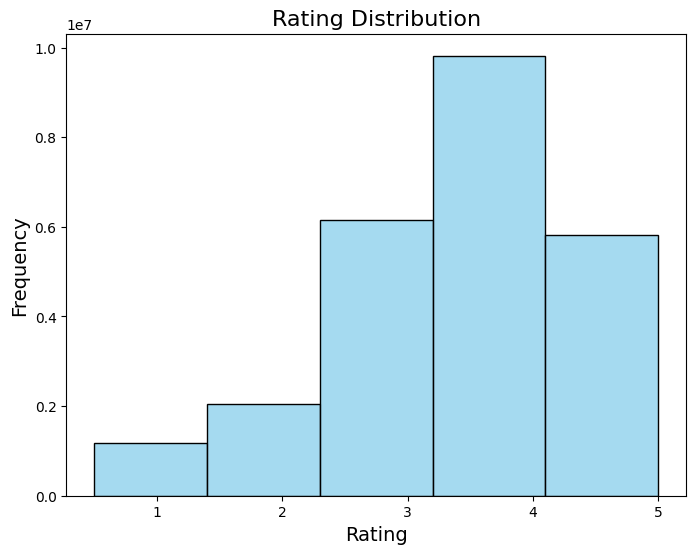

In [10]:
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.histplot(df2['rating'], bins=5, kde=False, color='skyblue')
plt.title('Rating Distribution', fontsize=16)
plt.xlabel('Rating', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.show()

In [11]:
combined_data = ratings_data.merge(movies_data, on='movieId')
print(combined_data.head())


avg_ratings_per_movie = combined_data.groupby('title')['rating'].mean().sort_values(ascending=False)
print("Top 10 Movies with the Highest Average Rating:")
print(avg_ratings_per_movie.head(10))

movie_rating_counts = combined_data.groupby('title')['rating'].count().sort_values(ascending=False)
print("Top 10 Movies with the Most Rating:")
print(movie_rating_counts.head(10))

   userId  movieId  rating                                       title  \
0       1      296     5.0                           Pulp Fiction 1994   
1       1      306     3.5  Three Colors Red Trois couleurs Rouge 1994   
2       1      307     5.0  Three Colors Blue Trois couleurs Bleu 1993   
3       1      665     5.0                            Underground 1995   
4       1      899     3.5                     Singin in the Rain 1952   

                             genres  
0  [Comedy, Crime, Drama, Thriller]  
1                           [Drama]  
2                           [Drama]  
3              [Comedy, Drama, War]  
4        [Comedy, Musical, Romance]  
Top 10 Movies with the Highest Average Rating:
title
Hide 2011                                                   5.0
Hercules Against the Mongols 1963                           5.0
Girls Club 1936                                             5.0
Hercules vs the Giant Warriors 1964                         5.0
Henry VIII and His

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer_title = TfidfVectorizer(ngram_range=(1,2))

tfidf_title = vectorizer_title.fit_transform(movies_data['title'])

def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Interstellar")
print(movie_results)

       movieId                                              title  \
21199   109487                                  Interstellar 2014   
60773   204120                   The Science of Interstellar 2014   
20815   107630                                   High School 2010   
20814   107625                                         Gorko 2013   
20813   107623  2013 Rock and Roll Hall of Fame Induction Cere...   

                       genres  
21199          [Sci-Fi, IMAX]  
60773           [Documentary]  
20815                [Comedy]  
20814                [Comedy]  
20813  [Documentary, Musical]  


In [13]:
def search_by_title(title):
    title = clean_title(title)
    query_vec = vectorizer_title.transform([title])
    similarity = cosine_similarity(query_vec, tfidf_title).flatten()
    indices = np.argpartition(similarity, -5)[-5:]
    results = movies_data.iloc[indices][::-1]
    return results

movie_results = search_by_title("Fast and Furious")
print(movie_results)

       movieId                                             title  \
13226    67923     Fast  Furious Fast and the Furious 4 The 2009   
19769   102716   Fast  Furious 6 Fast and the Furious 6 The 2013   
6264      6383  2 Fast 2 Furious Fast and the Furious 2 The 2003   
4264      4369                     Fast and the Furious The 2001   
13528    69945                     Fast and the Furious The 1955   

                                 genres  
13226  [Action, Crime, Drama, Thriller]  
19769   [Action, Crime, Thriller, IMAX]  
6264          [Action, Crime, Thriller]  
4264          [Action, Crime, Thriller]  
13528                  [Crime, Mystery]  


In [14]:
vectorizer_genres = TfidfVectorizer(ngram_range=(1,2))

# Gabungkan genre list menjadi string
movies_data['genres_text'] = movies_data['genres'].apply(lambda x: ' '.join(x))

tfidf_genres = vectorizer_genres.fit_transform(movies_data['genres_text'])

def search_similar_genres(genres):
    query_vec = vectorizer_genres.transform([genres])
    similarity = cosine_similarity(query_vec, tfidf_genres).flatten()
    indices = np.argpartition(similarity, -10)[-10:]
    results = movies_data.iloc[indices][::-1]
    return results

gen = 'Adventure Action'
print(search_similar_genres(gen))

       movieId                                              title  \
39733   157869             The Adventures of Robinson Crusoe 1922   
27938   130534                          And I Alone Survived 1978   
13145    67098                                    Billy Budd 1962   
57377   196235                               The Golden Mean 2010   
13085    66537  Letter for the King The Brief voor de koning D...   
7941      8654                                Prince Valiant 1954   
46909   173419                   The Devil Came from Akasava 1971   
27235   128658                                The Lost Tribe 1949   
27799   130192                             Morgan the Pirate 1960   
27731   130024                             Siren of Atlantis 1949   

            genres genres_text  
39733  [Adventure]   Adventure  
27938  [Adventure]   Adventure  
13145  [Adventure]   Adventure  
57377  [Adventure]   Adventure  
13085  [Adventure]   Adventure  
7941   [Adventure]   Adventure  
46909  [A

In [15]:
def scores_calculator(movie_id):
    # Filter data for similar users
    similar_users = combined_data.loc[
        (combined_data['movieId'] == movie_id) & (combined_data['rating'] >= 4), 'userId'
    ].unique()

    # Get recommendations based on similar users
    similar_user_recs = combined_data.loc[
        (combined_data['userId'].isin(similar_users)) & (combined_data['rating'] >= 4), 'movieId'
    ].value_counts(normalize=True)

    # Get recommendations based on all users
    all_user_recs = combined_data.loc[
        combined_data['movieId'].isin(similar_user_recs.index) & (combined_data['rating'] >= 4)
    ]
    all_user_recs = all_user_recs['movieId'].value_counts(normalize=True)

    # Filter genre of selected movie
    selected_genres = combined_data.loc[combined_data['movieId'] == movie_id, 'genres'].iloc[0]
    if isinstance(selected_genres, list):
        selected_genres = " ".join(selected_genres)

    # Search for movies with similar genres
    movies_with_similar_genres = search_similar_genres(selected_genres)
    similar_genre_ids = movies_with_similar_genres['movieId']

    # Multiply scores by similar genres
    similar_user_recs.loc[similar_user_recs.index.isin(similar_genre_ids)] *= 1.5
    all_user_recs.loc[all_user_recs.index.isin(similar_genre_ids)] *= 0.9

   # Combine scores and calculate ranking
    scores = pd.DataFrame({
        'similar': similar_user_recs,
        'all': all_user_recs
    }).fillna(0)

   # Avoid zero division
    scores['score'] = np.where(scores['all'] > 0, scores['similar'] / scores['all'], 0)

    # Sort by highest score
    return scores.sort_values('score', ascending=False)

scores_calculator(3114)

,similar,all,score
movieId,,,
200630,3.933811e-06,5.794305e-07,6.789099
115875,1.426006e-05,2.245293e-06,6.351093
115879,8.359348e-06,1.448576e-06,5.770734
144544,3.278176e-07,8.047646e-08,4.073459
143539,3.278176e-07,8.047646e-08,4.073459
...,...,...,...
853,3.278176e-07,3.540964e-06,0.092579
601,3.278176e-07,3.701917e-06,0.088553
797,3.278176e-07,3.862870e-06,0.084864


In [16]:
def recommendation_results(user_input, title=0):
    # user_input = clean_title(user_input)
    title_candidates = search_by_title(user_input)
    movie_id = title_candidates.iloc[title]['movieId']
    scores = scores_calculator(movie_id)
    results = scores.head(10).merge(movies_data, left_index=True, right_on='movieId')[['title', 'score', 'genres']]
    resutls = results.rename(columns={'title': 'title', 'genres': 'genres'}, inplace=True)
    return results

user_input = "Gumanji"
print("Here a similar movies: ")
for i in range(5):
    print(i, ": ", search_by_title(user_input)['title'].iloc[i])

title = 0
print("Recommendation_results: ")
print(recommendation_results(user_input))

Here a similar movies: 
0 :  Toy Story 1995
1 :  Women of Devils Island 1962
2 :  A Girl Thing 2001
3 :  Bad Poems 2018
4 :  Window of the Soul 2001
Recommendation_results: 
                                        title     score  \
22634          Toy Story Toons Small Fry 2011  4.063031   
59335                       Missing Link 2019  4.063031   
22633  Toy Story Toons Hawaiian Vacation 2011  3.800900   
20015                              Turbo 2013  2.471914   
17994                        Lfe Happens 2012  2.437819   
8305                           Cheat The 1915  2.437819   
35866                  Totally True Love 2011  2.437819   
4798     Way We Laughed The Cos Ridevano 1998  2.437819   
7144            Hangin with the Homeboys 1991  2.437819   
36039             The Peewee Herman Show 1981  2.437819   

                                                  genres  
22634  [Adventure, Animation, Children, Comedy, Fantasy]  
59335  [Adventure, Animation, Children, Comedy, Fantasy]  